# HSI Biopsy Data Analysis Example

This notebook demonstrates basic loading and analysis of hyperspectral imaging data from biopsy samples using the restructured HSIDataset that treats each HSI cube as an individual sample.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Add project root to path
sys.path.append('..')

# Import project modules
from src.dataset import HSIDataset

## Data Loading

In this section, we'll load the HSI data using the restructured HSIDataset class where each sample represents a single HSI cube.

In [3]:
# Initialize the dataset
hsi_dataset = HSIDataset()

# Get total number of HSI cubes in the dataset
print(f"Total HSI cubes in dataset: {len(hsi_dataset)}")


# Get a single HSI cube by index
sample = hsi_dataset.get_sample_by_combined_id('1.28_1')
print(f"\nSample combined ID: {sample['combined_id']}")
print(f"Patient ID: {sample['patient_id']}")
print(f"FOV: {sample['fov']}")

Total HSI cubes in dataset: 49

Sample combined ID: 1.28_1
Patient ID: S1.28
FOV: 1


In [4]:
# Print shape of the HSI cube
print(f"HSI cube shape: {sample['hsi_cube'].shape}")

# Print metadata
print("\nMetadata:")
for key, value in sample['metadata'].items():
    print(f"  {key}: {value}")

HSI cube shape: (127, 2048, 2048)

Metadata:
  id: S. 1.28
  age: 82.0
  sex: F
  type_of_tumor: Mening
  grading: 2.0
  additional_info: Recidiva di meningioma di convessità parietale grado II WHO
  histology: Meningioma atipico, grado 2
  Ki-67-index: 20 %
  normalized_id: S1.28


## Visualization

Let's visualize the data by creating an RGB representation and looking at some spectral signatures.

/home/home/tim_ivan/thesis/tim_thesis/notebooks/../src/visualize_data.py:38: UserWarning: You passed a edgecolor/edgecolors ([]) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_plot = ax_img.scatter([], [], c=[], s=100, marker="+", edgecolors=[])


Button(description='Clear Selection', style=ButtonStyle())

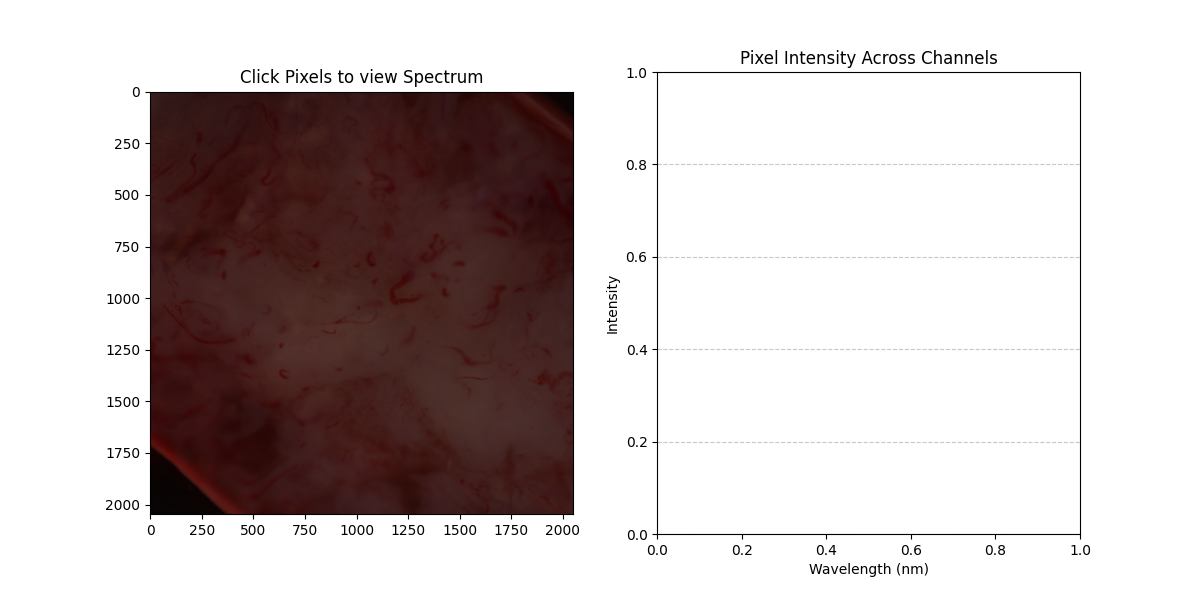

In [5]:
from src.visualize_data import show_interactive_image_with_spectrum

%matplotlib widget
show_interactive_image_with_spectrum(sample['hsi_cube'])

## Next Steps

In a real analysis workflow, next steps might include:

1. Spectral preprocessing (smoothing, normalization)
2. Dimensionality reduction (PCA, t-SNE)
3. Feature extraction
4. Classification or clustering
5. Validation against ground truth

These steps would be implemented as the project develops.

## Accessing Samples in Different Ways

The restructured HSIDataset provides multiple methods to access samples:

In [ ]:
# 1. Get a sample by combined ID (patient_number_fov)
patient_num = sample['combined_id'].split('_')[0]  # Get from first sample
fov_num = sample['combined_id'].split('_')[1]
combined_id = f"{patient_num}_{fov_num}"
sample_by_combined_id = hsi_dataset.get_sample_by_combined_id(combined_id)
print(f"\nSample retrieved by combined ID '{combined_id}':\n  Patient ID: {sample_by_combined_id['patient_id']}\n  FOV: {sample_by_combined_id['fov']}")

# 2. Get all samples for a specific patient
patient_id = sample['patient_id']  # Get from first sample
patient_samples = hsi_dataset.get_samples_by_patient_id(patient_id)
print(f"\nFound {len(patient_samples)} samples for patient '{patient_id}'")
for i, ps in enumerate(patient_samples):
    print(f"  Sample {i+1}: FOV {ps['fov']}, HSI cube shape {ps['hsi_cube'].shape}")

# 3. Get a specific sample by patient ID and FOV
specific_sample = hsi_dataset.get_sample_by_patient_and_fov(patient_id, fov_num)
print(f"\nRetrieved specific sample - Patient: {specific_sample['patient_id']}, FOV: {specific_sample['fov']}")